# Atividade 01

# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

In [2]:
# Carregando e exibindo as primeiras linhas do conjunto de dados
dados = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dados.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

- Feito

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

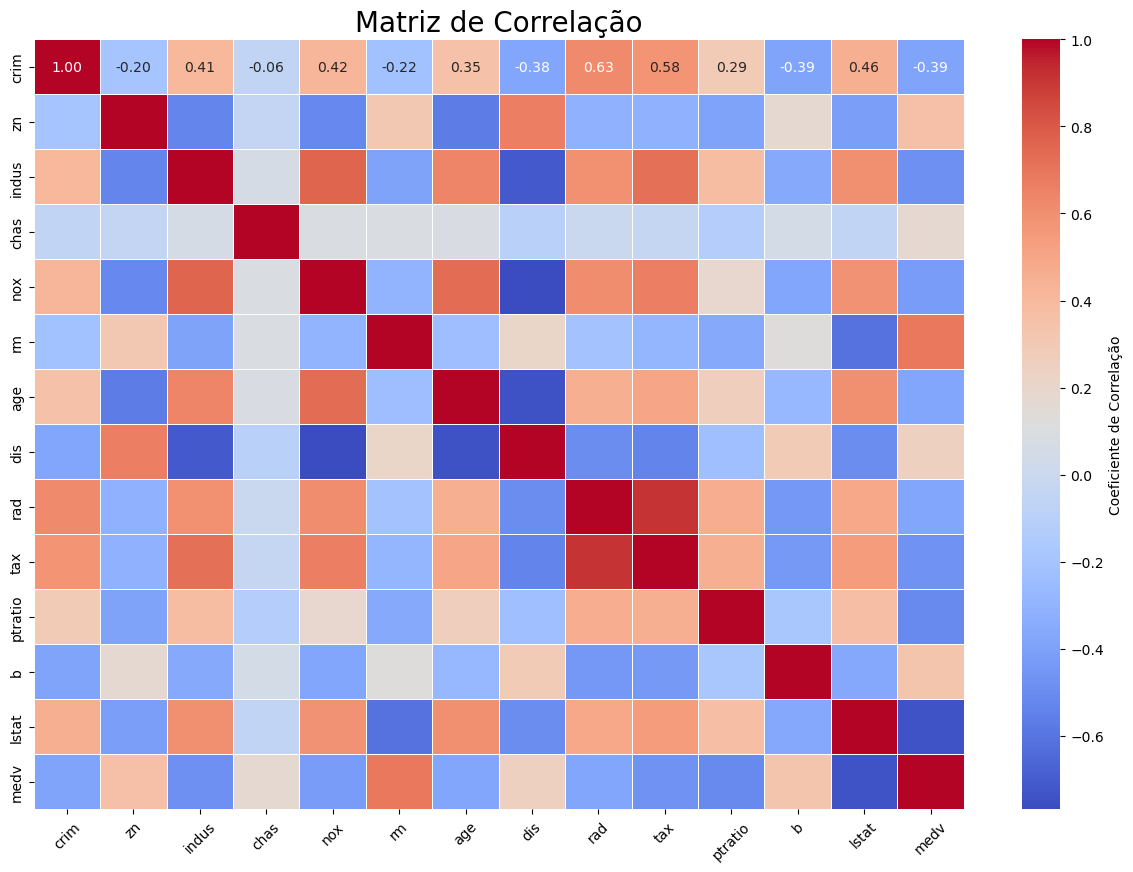

In [4]:
# Calculando a matriz de correlação
matriz_correlacao = dados.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
            annot_kws={"size": 10}, cbar_kws={'label': 'Coeficiente de Correlação'})

# Rotacionando rótulos x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionando título ao gráfico
plt.title('Matriz de Correlação', fontsize=20)

# Exibindo o gráfico
plt.show()

### 3. Separe os dados em validação e teste

In [5]:
# Separando features (X) e target (y)
X = dados.drop(columns=['medv']).copy()
y = dados['medv']

# Dividindo os dados em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [7]:
# Criando e treinando o modelo de árvore de decisão com profundidade máxima 8
modelo_arvore_1 = DecisionTreeRegressor(max_depth=8)
modelo_arvore_1.fit(X_train, y_train)

# Criando e treinando o modelo de árvore de decisão com profundidade máxima 2
modelo_arvore_2 = DecisionTreeRegressor(max_depth=2)
modelo_arvore_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [8]:
# Criando uma lista de modelos de árvore de decisão com diferentes profundidades
modelos_arvore = [modelo_arvore_1, modelo_arvore_2]

# Criando uma tabela para exibir os resultados
tabela_resultados = PrettyTable()
tabela_resultados.field_names = ["Profundidade", "MSE Treino", "MSE Teste"]

# Avaliando o desempenho dos modelos no conjunto de treino e teste
for modelo_arvore in modelos_arvore:
    mse_treino = mean_squared_error(y_train, modelo_arvore.predict(X_train))
    mse_teste = mean_squared_error(y_test, modelo_arvore.predict(X_test))
    
    # Adicionando uma linha à tabela
    tabela_resultados.add_row([modelo_arvore.get_depth(), mse_treino, mse_teste])

# Imprimindo a tabela
print(tabela_resultados)

+--------------+--------------------+--------------------+
| Profundidade |     MSE Treino     |     MSE Teste      |
+--------------+--------------------+--------------------+
|      8       | 1.021670409005186  | 18.546863732615652 |
|      2       | 20.199091277115325 | 26.946875954848558 |
+--------------+--------------------+--------------------+


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

- 8

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

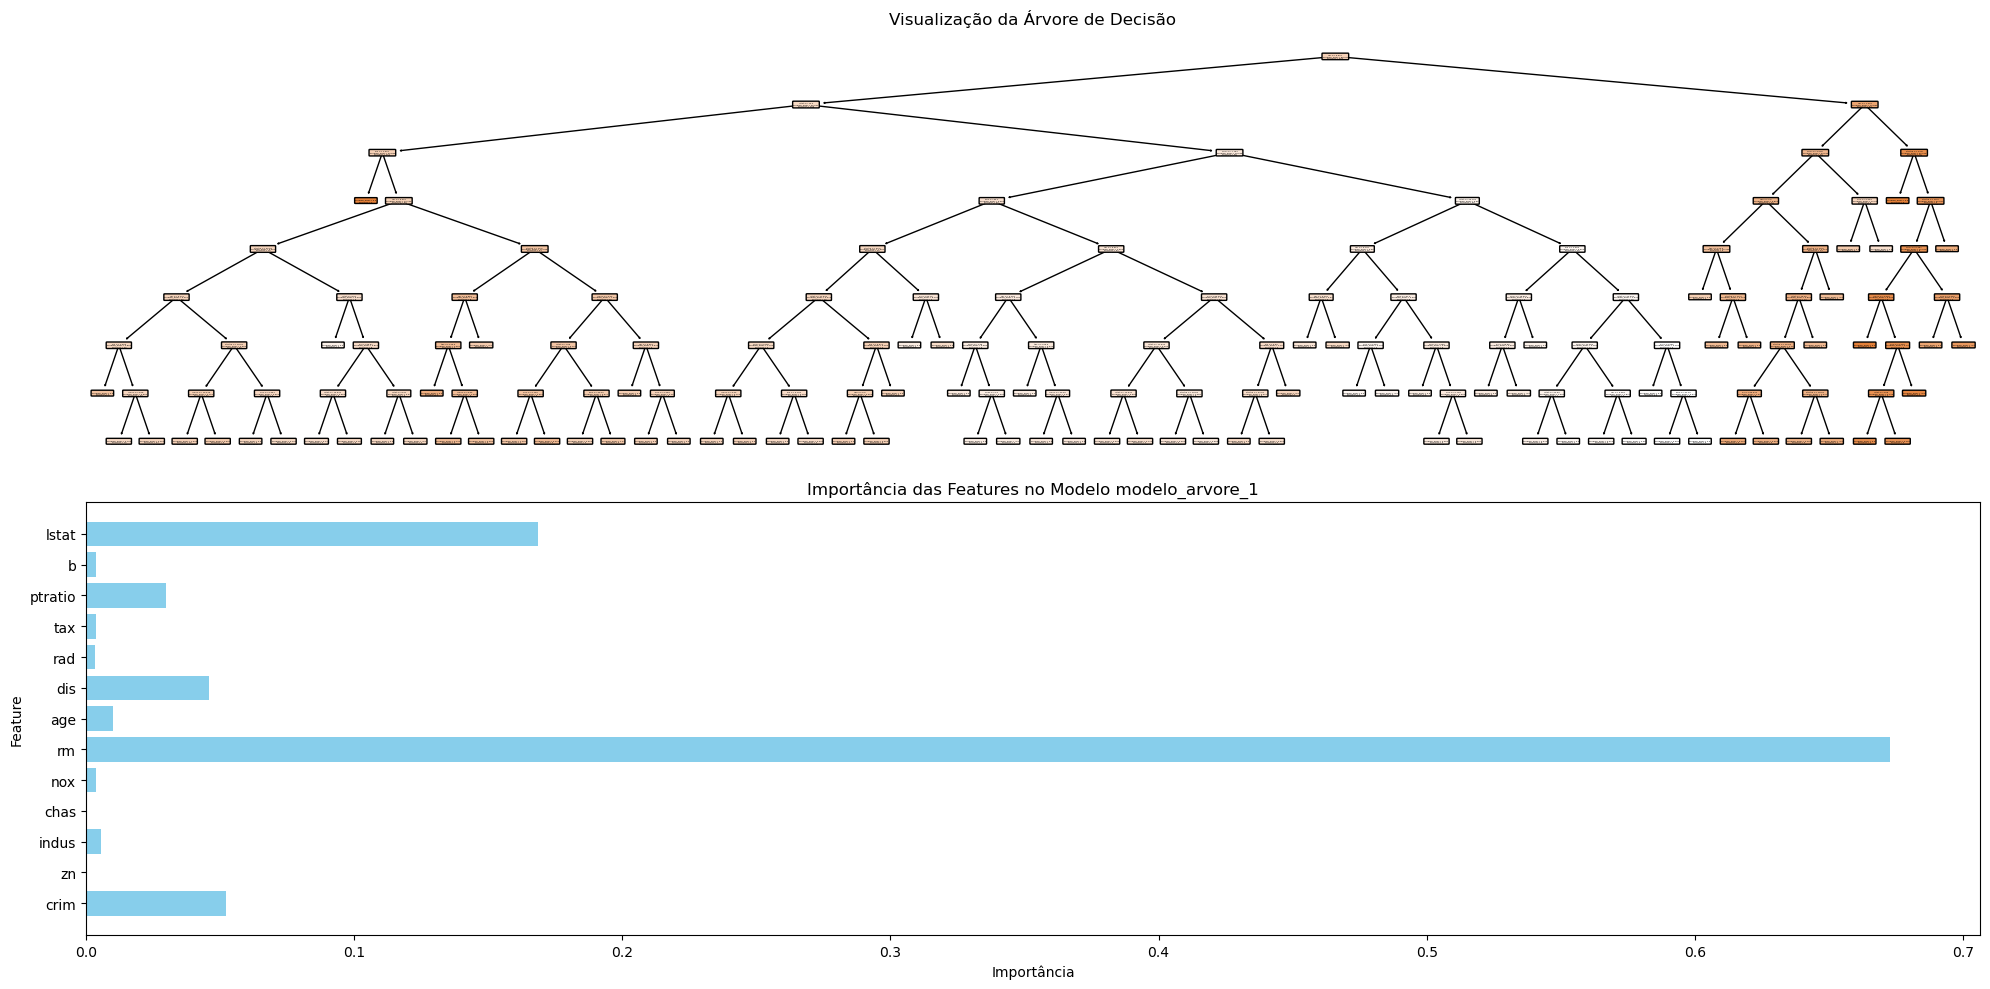

In [9]:
# Supondo que 'dados' seja seu DataFrame
nomes_features = dados.columns[:-1].tolist()  # Exclua a variável alvo 'medv'

# Visualizando a árvore de decisão e as importâncias das features em subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

# Plotando a árvore de decisão
plot_tree(modelo_arvore_1, feature_names=nomes_features, filled=True, rounded=True, ax=axes[0])
axes[0].set_title('Visualização da Árvore de Decisão')

# Plotando as importâncias das features
importancias = modelo_arvore_1.feature_importances_
axes[1].barh(nomes_features, importancias, color='skyblue')
axes[1].set_xlabel('Importância')
axes[1].set_ylabel('Feature')
axes[1].set_title('Importância das Features no Modelo modelo_arvore_1')

# Ajustando o layout
plt.tight_layout()
plt.show()

- Aparentemente RM é a variavel mais importante.

# Atividade 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

In [11]:
# Carregando e exibindo as primeiras linhas do conjunto de dados
dados = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
dados.head()

# Separando features (X) e target (y)
X = dados.drop(columns=['medv']).copy()
y = dados['medv']

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

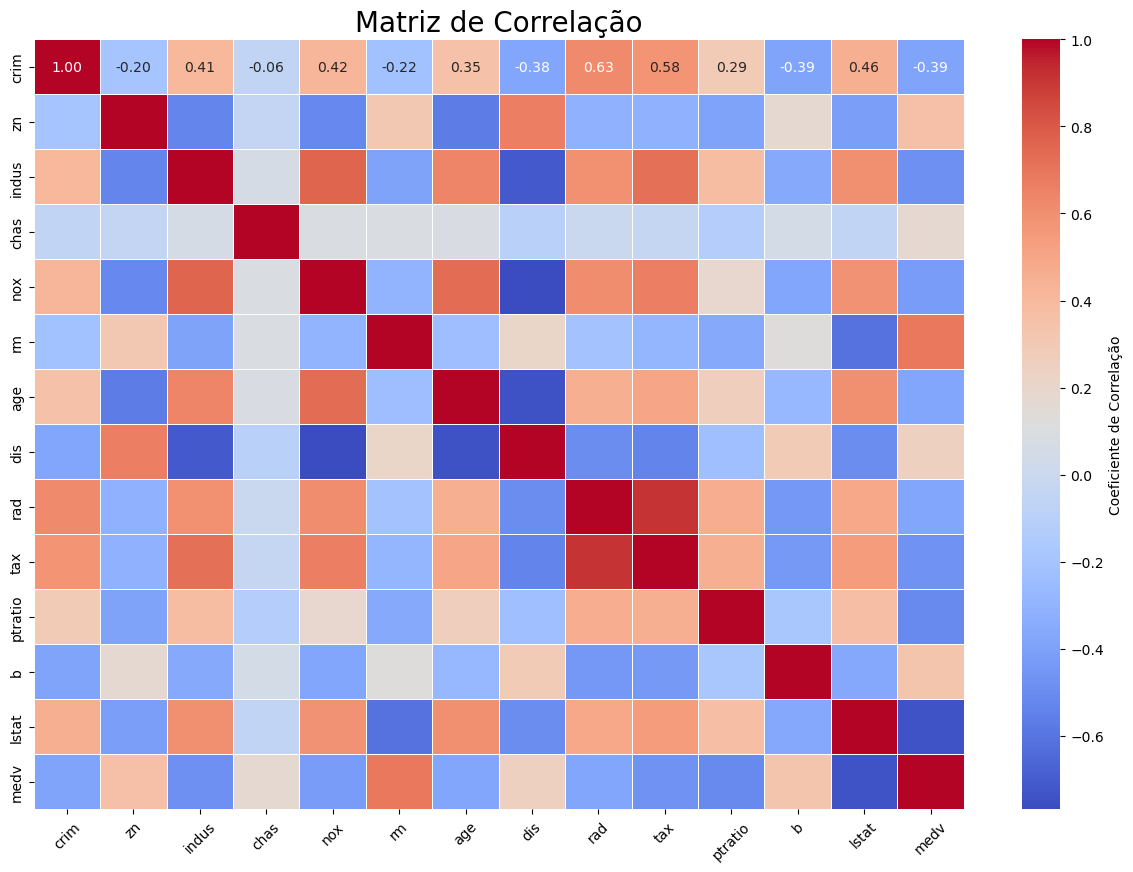

In [12]:
# Calculando a matriz de correlação
matriz_correlacao = dados.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5,
            annot_kws={"size": 10}, cbar_kws={'label': 'Coeficiente de Correlação'})

# Rotacionando rótulos x para melhor legibilidade
plt.xticks(rotation=45)

# Adicionando título ao gráfico
plt.title('Matriz de Correlação', fontsize=20)

# Exibindo o gráfico
plt.show()

In [13]:
# Separando features (X) e target (y)
X = dados.drop(columns=['medv']).copy()
y = dados['medv']

# Dividindo os dados em conjuntos de treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

In [14]:
# Criando e treinando o modelo de árvore de decisão com profundidade máxima 8
modelo_arvore_1 = DecisionTreeRegressor(max_depth=8)
modelo_arvore_1.fit(X_train, y_train)

# Criando e treinando o modelo de árvore de decisão com profundidade máxima 2
modelo_arvore_2 = DecisionTreeRegressor(max_depth=2)
modelo_arvore_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [15]:
# Criando uma lista de modelos de árvore de decisão com diferentes profundidades
modelos_arvore = [modelo_arvore_1, modelo_arvore_2]

# Criando uma tabela para exibir os resultados
tabela_resultados = PrettyTable()
tabela_resultados.field_names = ["Profundidade", "MSE Treino", "MSE Teste"]

# Avaliando o desempenho dos modelos no conjunto de treino e teste
for modelo_arvore in modelos_arvore:
    mse_treino = mean_squared_error(y_train, modelo_arvore.predict(X_train))
    mse_teste = mean_squared_error(y_test, modelo_arvore.predict(X_test))
    
    # Adicionando uma linha à tabela
    tabela_resultados.add_row([modelo_arvore.get_depth(), mse_treino, mse_teste])

# Imprimindo a tabela
print(tabela_resultados)

+--------------+--------------------+--------------------+
| Profundidade |     MSE Treino     |     MSE Teste      |
+--------------+--------------------+--------------------+
|      8       | 1.021670409005186  | 19.707545405259093 |
|      2       | 20.199091277115325 | 26.94687595484856  |
+--------------+--------------------+--------------------+


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [16]:
# Criando e treinando o modelo de árvore de decisão com poda por complexidade de custo
modelo_poda = DecisionTreeRegressor(random_state=42)
modelo_poda.fit(X_train, y_train)

# Obtendo o caminho de poda por complexidade de custo
caminho_poda = modelo_poda.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho_poda.ccp_alphas, caminho_poda.impurities

# Criando uma tabela para exibir os resultados
tabela_resultados = PrettyTable()
tabela_resultados.field_names = ["CCP Alpha", "Impureza"]

# Adicionando os valores ao CCP Alpha e Impurity na tabela
for alpha, impureza in zip(ccp_alphas, impurities):
    tabela_resultados.add_row([alpha, impureza])

# Imprimindo a tabela
print(tabela_resultados)

# Exibindo os valores do primeiro e último CCP Alpha
print("Primeiro CCP Alpha:", ccp_alphas[0])
print("Último CCP Alpha:", ccp_alphas[-1])

+------------------------+-------------------------+
|       CCP Alpha        |         Impureza        |
+------------------------+-------------------------+
|          0.0           |  -5.135605911929438e-15 |
| 2.110522977505248e-16  | -4.9245536141789134e-15 |
| 2.2512245093389313e-15 |  -2.673329104839982e-15 |
| 6.190867400682061e-15  |  3.517538295842079e-15  |
| 2.475247524750224e-05  |  2.4752475251019778e-05 |
| 2.475247524750224e-05  |  4.950495049852202e-05  |
| 2.475247524750224e-05  |  7.425742574602425e-05  |
| 2.475247524750224e-05  |  9.900990099352649e-05  |
| 2.475247524750224e-05  |  0.00012376237624102873 |
| 2.475247524750224e-05  |  0.00014851485148853098 |
| 2.475247524750224e-05  |  0.00017326732673603323 |
| 2.4752475247783645e-05 |  0.00019801980198381688 |
| 2.4752475247783645e-05 |  0.00022277227723160054 |
| 2.4752475248065046e-05 |  0.0002475247524796656  |
| 2.4752475248065046e-05 |  0.00027227722772773063 |
| 2.4752475248065046e-05 |  0.0002970297029757

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
# Criando uma lista de modelos de árvore de decisão com diferentes valores de CCP Alpha
modelos_arvore = [DecisionTreeRegressor(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [19]:
# Calculando os valores de MSE para cada modelo na lista de árvores
mse_valores = [mean_squared_error(y_test, arvore.predict(X_test)) for arvore in modelos_arvore]

# Criando uma tabela para exibir os resultados
tabela_resultados = PrettyTable()
tabela_resultados.field_names = ["Modelo", "MSE"]

# Adicionando os valores ao Modelo e MSE na tabela
for idx, mse in enumerate(mse_valores, start=1):
    tabela_resultados.add_row([f"Modelo {idx}", mse])

# Imprimindo a tabela
print(tabela_resultados)

+------------+--------------------+
|   Modelo   |        MSE         |
+------------+--------------------+
|  Modelo 1  | 18.642540983606565 |
|  Modelo 2  | 18.642540983606565 |
|  Modelo 3  | 18.642540983606565 |
|  Modelo 4  | 18.642540983606565 |
|  Modelo 5  |  18.6463524590164  |
|  Modelo 6  |  18.6463524590164  |
|  Modelo 7  |  18.6463524590164  |
|  Modelo 8  |  18.6463524590164  |
|  Modelo 9  |  18.6463524590164  |
| Modelo 10  |  18.6463524590164  |
| Modelo 11  |  18.6463524590164  |
| Modelo 12  | 18.647766393442627 |
| Modelo 13  | 18.647766393442627 |
| Modelo 14  | 18.644036885245907 |
| Modelo 15  | 18.644036885245907 |
| Modelo 16  | 18.644036885245907 |
| Modelo 17  | 18.64245901639345  |
| Modelo 18  | 18.64245901639345  |
| Modelo 19  | 18.643709016393448 |
| Modelo 20  | 18.64397313296904  |
| Modelo 21  | 18.64397313296904  |
| Modelo 22  | 18.64848132969035  |
| Modelo 23  | 18.64848132969035  |
| Modelo 24  | 18.64856329690347  |
| Modelo 25  | 18.6485632969

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

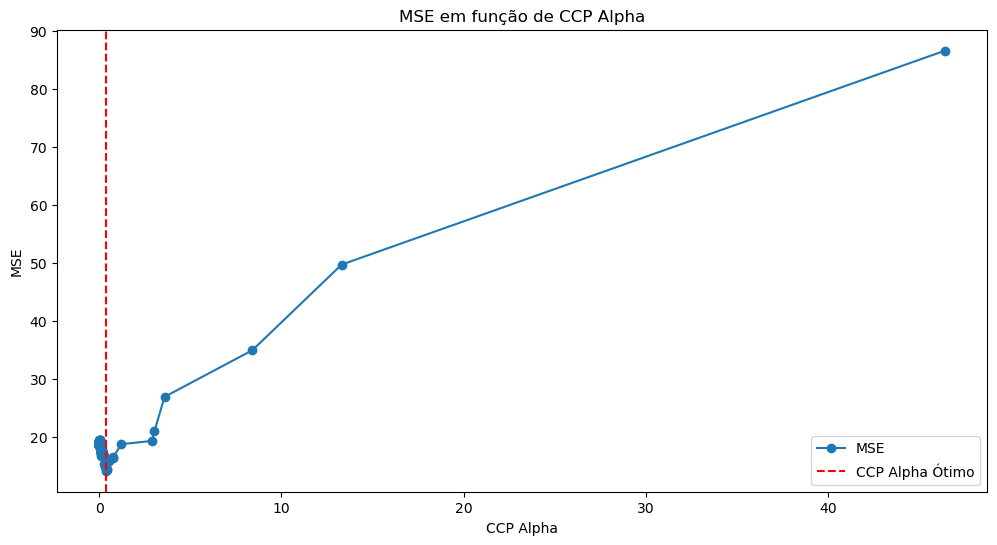

+--------------------+--------------------+
|  CCP Alpha Ótimo   |        MSE         |
+--------------------+--------------------+
| 0.3826430143014009 | 14.206680384944008 |
+--------------------+--------------------+


In [20]:
# Convertendo mse_valores para um array NumPy
mse_valores_np = np.array(mse_valores)

# Encontrando o CCP Alpha ótimo
ccp_alpha_otimo = ccp_alphas[np.argmin(mse_valores_np)]

# Plotando o gráfico de MSE em função de CCP Alpha
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, mse_valores_np, marker='o', label='MSE')
plt.axvline(x=ccp_alpha_otimo, color='red', linestyle='--', label='CCP Alpha Ótimo')

plt.ylabel("MSE")
plt.xlabel("CCP Alpha")
plt.title("MSE em função de CCP Alpha")
plt.legend()
plt.show()

# Criando uma tabela para exibir os resultados
tabela_resultados_otimo = PrettyTable()
tabela_resultados_otimo.field_names = ["CCP Alpha Ótimo", "MSE"]
tabela_resultados_otimo.add_row([ccp_alpha_otimo, np.min(mse_valores_np)])

# Imprimindo a tabela
print(tabela_resultados_otimo)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [21]:
# Criando o modelo de árvore de decisão com o CCP Alpha ótimo
arvore_otima = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha_otimo).fit(X_train, y_train)

# Calculando o R-quadrado do modelo no conjunto de teste
r_quadrado = arvore_otima.score(X_test, y_test)

# Criando uma tabela para exibir os resultados
tabela_resultados_otimo = PrettyTable()
tabela_resultados_otimo.field_names = ["CCP Alpha Ótimo", "R-quadrado no Conjunto de Teste"]
tabela_resultados_otimo.add_row([ccp_alpha_otimo, r_quadrado])

# Imprimindo a tabela
print(tabela_resultados_otimo)

+--------------------+---------------------------------+
|  CCP Alpha Ótimo   | R-quadrado no Conjunto de Teste |
+--------------------+---------------------------------+
| 0.3826430143014009 |        0.8349222971176764       |
+--------------------+---------------------------------+


### 7. Visualize esta árvore.

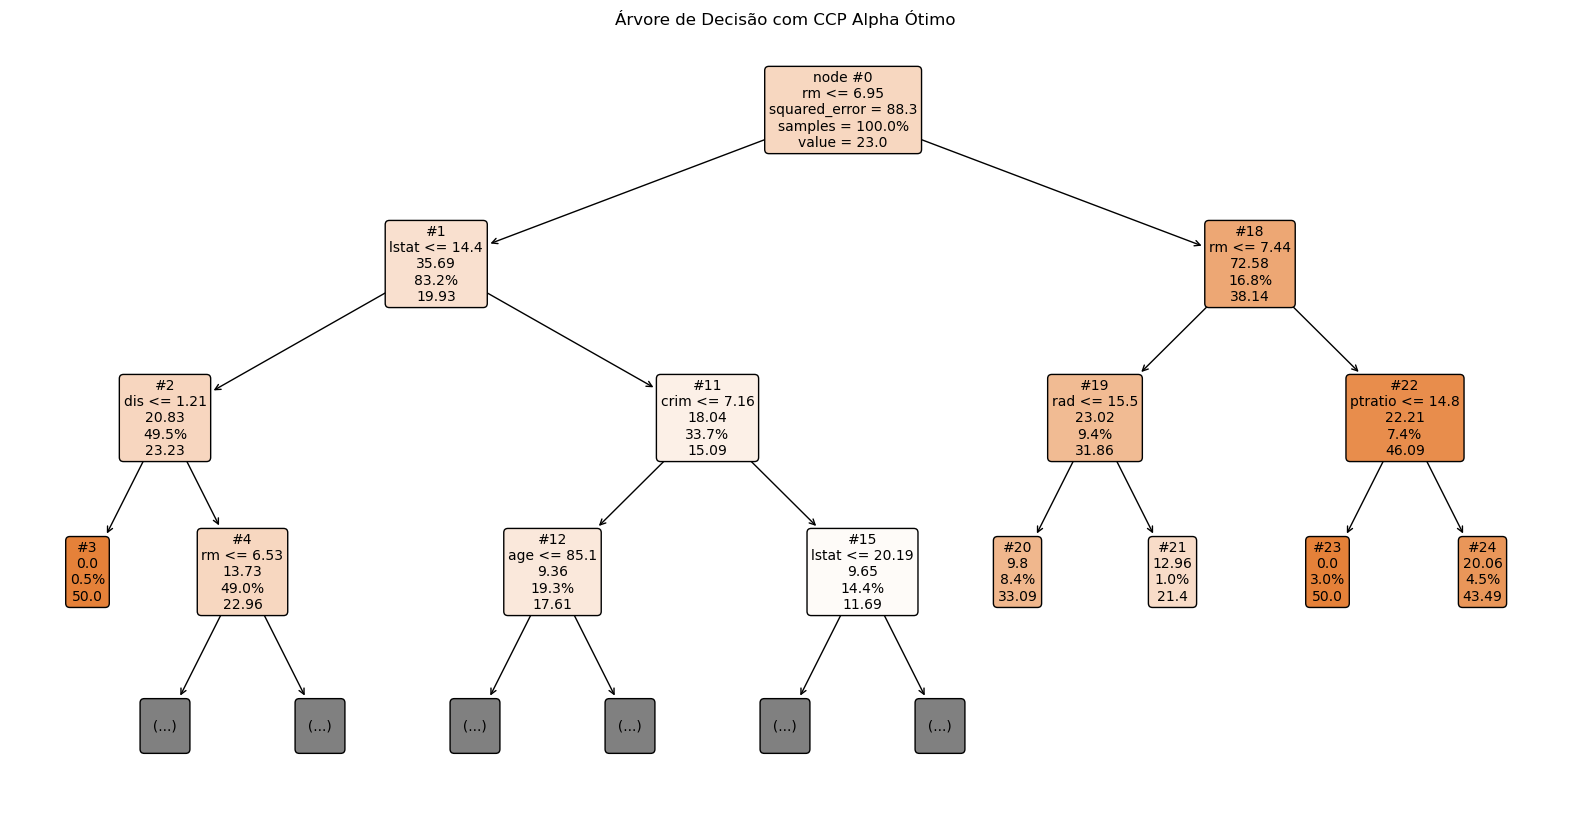

In [22]:
# Plotando a árvore de decisão com o CCP Alpha ótimo
plt.figure(figsize=(20, 10))
plot_tree(arvore_otima, filled=True, feature_names=list(X.columns), fontsize=10, impurity=True, proportion=True, precision=2, rounded=True, node_ids=True, label="root", class_names=["Low", "High"], max_depth=3)
plt.title("Árvore de Decisão com CCP Alpha Ótimo")
plt.show()